In [160]:
from config import gkey
from config import weatherkey
from citipy import citipy
import numpy as np
import pandas as pd
import requests
import json
from pprint import pprint
from matplotlib import pyplot as plt
from scipy import stats

In [ ]:
# Build Cities Table 
# define empty lists
citylist = []
latlist = []
longlist = []
countrycodelist = []
loopcount = 0

# define length of script
MaxCities = 5


# create dataframe 
City_df = pd.DataFrame()
header_list = ['Lattitude','Longitude']
City_df = City_df.reindex(columns = header_list)      

# lats and longs
for cities in range(1,(MaxCities +1)):
    cities_lat = round(np.random.uniform(-90, 90),4)
    latlist.append(cities_lat)
    cities_long = round(np.random.uniform(-180, 180),4)
    longlist.append(cities_long)

# append Lattitude and Longitude to DF
City_df['Lattitude'] = pd.Series(latlist)
City_df['Longitude'] = pd.Series(longlist)


# Get Cities from PyCities
for i in range(0,len(City_df['Lattitude'])):
    lat = City_df.iloc[i]['Lattitude']
    long = City_df.iloc[i]['Longitude']
    cityname = citipy.nearest_city(lat,long).city_name.title()
    citycountry = citipy.nearest_city(lat,long).country_code.upper()
#     print(f'{lat} {long} {cityname} {citycountry}')
    citylist.append(cityname)
    countrycodelist.append(citycountry)

# Append Cities to DF
City_df.insert(0,'City',citylist)
City_df.insert(1, 'Country', countrycodelist)
City_df

In [ ]:
# Edit Dataframe and add columns

City_df['Temperature C'] = ""
City_df['Temperature F'] = ""
City_df['Revised Lattitude'] = ""
City_df['Revised Longitude'] = ""
City_df['Humidity %'] = ""
City_df['Cloudiness %'] = ""
City_df['Wind Speed (mph)'] = ""
City_df

In [ ]:
# api.openweathermap.org/data/2.5/weather?q=London,uk&appid={API key}

# build URL
base_url = 'http://api.openweathermap.org/data/2.5/weather?q='
# city = "Sao Filipe"
# country = 'CV'
comma = ','
andsign = '&'


# API GET & JSON
for index, row in City_df.iterrows():
    city = row['City']
    country = row['Country']
    full_url = base_url + city + comma + country + '&appid=' + weatherkey
    response = requests.get(full_url) 
    parsed_response = response.json()
    try:
        City_df.at[index,'Temperature C'] = (parsed_response["main"]["temp_max"] - 273)
        City_df.at[index,'Temperature F'] = (parsed_response["main"]["temp_max"] * 1.8 - 457.6)
        City_df.at[index,'Revised Lattitude'] = parsed_response["coord"]["lat"]
        City_df.at[index,'Revised Longitude'] = parsed_response["coord"]["lon"]
        City_df.at[index,'Humidity %'] = parsed_response["main"]["humidity"]
        City_df.at[index,'Cloudiness %'] = parsed_response["clouds"]["all"]
        City_df.at[index,'Wind Speed (mph)'] = (parsed_response["wind"]["speed"] * 2.24)
        print('city found: ' + city + " ," + country)
    except:
        print('City ' + city + ' not found! skipping')
        next
#     print(city + " " + str(CityTemp))




In [ ]:
City_df

In [ ]:
city = "Busselton"
country = 'AU'
full_url = base_url + city + comma + country + '&appid=' + weatherkey
response = requests.get(full_url) 
parsed_response = response.json()
# CityTemp = parsed_response["main"]["temp"]
pprint(parsed_response)


In [ ]:
if 'Bluff' in City_df['City'].values:
    print('yep!')



In [127]:
# define length of script
MaxCities = 20

# create dataframe 
City_df = pd.DataFrame()
header_list = ['City','Country','Lattitude','Longitude','Temperature C','Temperature F','Humidity %','Cloudiness %','Wind Speed (mph)']
City_df = City_df.reindex(columns = header_list)
City_df['City']= City_df['City'].astype(str)
City_df['Country']= City_df['Country'].astype(str)
City_df.dtypes

City                 object
Country              object
Lattitude           float64
Longitude           float64
Temperature C       float64
Temperature F       float64
Humidity %          float64
Cloudiness %        float64
Wind Speed (mph)    float64
dtype: object

In [144]:
loopcount = 0
MaxCities = 25

while loopcount < MaxCities:
    rowlist = []
    # set random lats and longs
    rand_lat = round(np.random.uniform(-90, 90),4)
    rand_long = round(np.random.uniform(-180, 180),4)
#     print(str(rand_lat) + " " + str(rand_long))
    # get city name and counry 
    cityname = citipy.nearest_city(rand_lat,rand_long).city_name.title()
    citycountry = citipy.nearest_city(rand_lat,rand_long).country_code.upper()
#     print(cityname + " " + citycountry)
    # test if city name already in list, and restart if so
    if cityname in City_df['City'].values:
        print(f'{cityname} is a Duplicate City, Restart!')
        continue
    # generate url and hit API 
    full_url = base_url + cityname + comma + citycountry + '&appid=' + weatherkey
    response = requests.get(full_url) 
    parsed_response = response.json()
    # attempt to load data into DF, if city was found and values can be parsed 
    try:
        City_df.at[loopcount, 'City']  = cityname    
        City_df.at[loopcount, 'Country'] = citycountry
        City_df.at[loopcount, 'Temperature C'] = (parsed_response["main"]["temp_max"] - 273)
        City_df.at[loopcount, 'Temperature F'] = (parsed_response["main"]["temp_max"] * 1.8 - 457.6)
        City_df.at[loopcount, 'Lattitude'] = parsed_response["coord"]["lat"]
        City_df.at[loopcount, 'Longitude'] = parsed_response["coord"]["lon"]
        City_df.at[loopcount, 'Humidity %'] = parsed_response["main"]["humidity"]
        City_df.at[loopcount, 'Cloudiness %'] = parsed_response["clouds"]["all"]
        City_df.at[loopcount, 'Wind Speed (mph)'] = (parsed_response["wind"]["speed"] * 2.24)
        print('city found: ' + cityname + " ," + citycountry)
        loopcount = loopcount + 1
    except:
        print('City ' + cityname + ' not found! skipping!')
        
    
    
#         City_df.at[index,'Country'] = citycountry
#         City_df.at[index,'Temperature C'] = (parsed_response["main"]["temp_max"] - 273)
#         City_df.at[index,'Temperature F'] = (parsed_response["main"]["temp_max"] * 1.8 - 457.6)
#         City_df.at[index,'Lattitude'] = parsed_response["coord"]["lat"]
#         City_df.at[index,'Longitude'] = parsed_response["coord"]["lon"]
#         City_df.at[index,'Humidity %'] = parsed_response["main"]["humidity"]
#         City_df.at[index,'Cloudiness %'] = parsed_response["clouds"]["all"]
#         City_df.at[index,'Wind Speed (mph)'] = (parsed_response["wind"]["speed"] * 2.24)



    
    
City_df

Albany is a Duplicate City, Restart!
City Taolanaro not found! skipping!
City Airai not found! skipping!
city found: Ushuaia ,AR
city found: East London ,ZA
city found: Barrow ,US
Hermanus is a Duplicate City, Restart!
City Almajiu not found! skipping!
city found: Faanui ,PF
Bredasdorp is a Duplicate City, Restart!
City Illoqqortoormiut not found! skipping!
city found: Touros ,BR
city found: Huarmey ,PE
City Taolanaro not found! skipping!
city found: Daska ,PK
city found: Hobart ,AU
city found: Punta Arenas ,CL
city found: Grindavik ,IS
city found: Chicama ,PE
city found: Iqaluit ,CA
Punta Arenas is a Duplicate City, Restart!
East London is a Duplicate City, Restart!
city found: Hermanus ,ZA
city found: Saskylakh ,RU
Kapaa is a Duplicate City, Restart!
city found: Saldanha ,ZA
city found: Upernavik ,GL
city found: Ucluelet ,CA
Kapaa is a Duplicate City, Restart!
City Mataura not found! skipping!
city found: Shenzhen ,CN
city found: Luderitz ,NA
Hobart is a Duplicate City, Restart!
city

,City,Country,Lattitude,Longitude,Temperature C,Temperature F,Humidity %,Cloudiness %,Wind Speed (mph)
0,Ushuaia,AR,-54.8000,-68.3000,4.15,41.270,93.0,90.0,20.7424
1,East London,ZA,-33.0153,27.9116,19.15,68.270,94.0,20.0,4.6144
2,Barrow,US,71.2906,-156.7887,-26.85,-14.530,83.0,1.0,5.7568
3,Faanui,PF,-16.4833,-151.7500,28.53,85.154,65.0,3.0,5.7344
4,Touros,BR,-5.1989,-35.4608,25.15,79.070,88.0,0.0,4.6144
5,Huarmey,PE,-10.0681,-78.1522,22.05,73.490,71.0,100.0,7.1456
6,Daska,PK,32.3243,74.3497,24.15,77.270,46.0,60.0,4.6144
7,Hobart,AU,-42.8794,147.3294,21.82,73.076,46.0,20.0,11.5136
8,Punta Arenas,CL,-53.1500,-70.9167,5.15,43.070,75.0,0.0,31.1136
9,Grindavik,IS,63.8424,-22.4338,3.15,39.470,75.0,90.0,21.8848


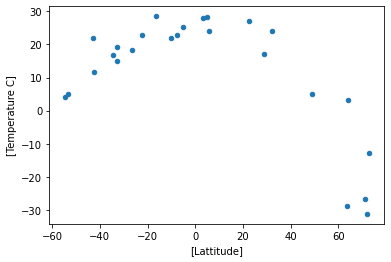

In [145]:
City_df.plot.scatter(['Lattitude'],['Temperature C'])

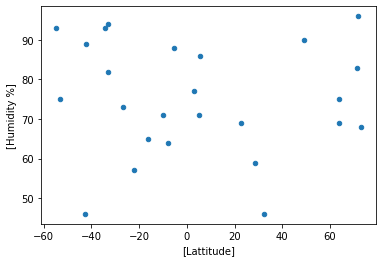

In [146]:
City_df.plot.scatter(['Lattitude'],['Humidity %'])

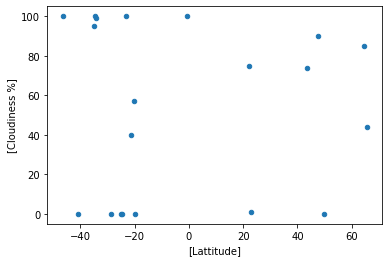

In [143]:
City_df.plot.scatter(['Lattitude'],['Cloudiness %'])

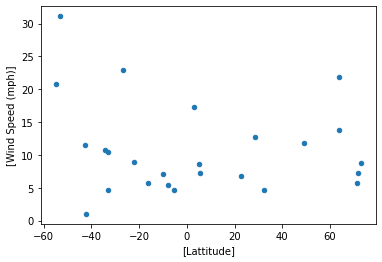

In [147]:
City_df.plot.scatter(['Lattitude'],['Wind Speed (mph)'])

In [155]:
# Hemispheric Analysis

NorthernHemisphere_df = City_df.loc[(City_df['Lattitude'] < 0)]
SouthernHemisphere_df = City_df.loc[(City_df['Lattitude'] > 0)]



,City,Country,Lattitude,Longitude,Temperature C,Temperature F,Humidity %,Cloudiness %,Wind Speed (mph)
0,Ushuaia,AR,-54.8000,-68.3000,4.15,41.270,93.0,90.0,20.7424
1,East London,ZA,-33.0153,27.9116,19.15,68.270,94.0,20.0,4.6144
3,Faanui,PF,-16.4833,-151.7500,28.53,85.154,65.0,3.0,5.7344
4,Touros,BR,-5.1989,-35.4608,25.15,79.070,88.0,0.0,4.6144
5,Huarmey,PE,-10.0681,-78.1522,22.05,73.490,71.0,100.0,7.1456
7,Hobart,AU,-42.8794,147.3294,21.82,73.076,46.0,20.0,11.5136
8,Punta Arenas,CL,-53.1500,-70.9167,5.15,43.070,75.0,0.0,31.1136
10,Chicama,PE,-7.8447,-79.1469,22.93,75.074,64.0,87.0,5.4656
12,Hermanus,ZA,-34.4187,19.2345,16.82,64.076,93.0,99.0,10.7296
14,Saldanha,ZA,-33.0117,17.9442,15.15,61.070,82.0,12.0,10.3712


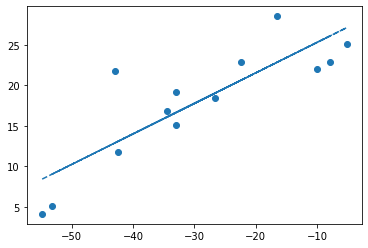

In [165]:
graph1 = plt.scatter(NorthernHemisphere_df['Lattitude'],NorthernHemisphere_df['Temperature C'])
g1_slope, g1_int, g1_r, g1_p, g1_std_err = stats.linregress(NorthernHemisphere_df['Lattitude'],NorthernHemisphere_df['Temperature C'])
g1_fit = g1_slope * NorthernHemisphere_df['Lattitude'] + g1_int
plt.plot(NorthernHemisphere_df['Lattitude'],g1_fit,"--")